In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df.drop(columns=["Cabin"], inplace=True, errors="ignore")
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [14]:
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df.to_csv("titanic_cleaned.csv", index=False)

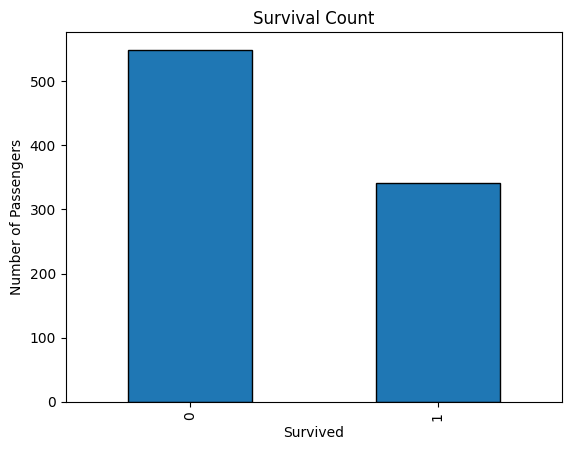

In [25]:
df["survived"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

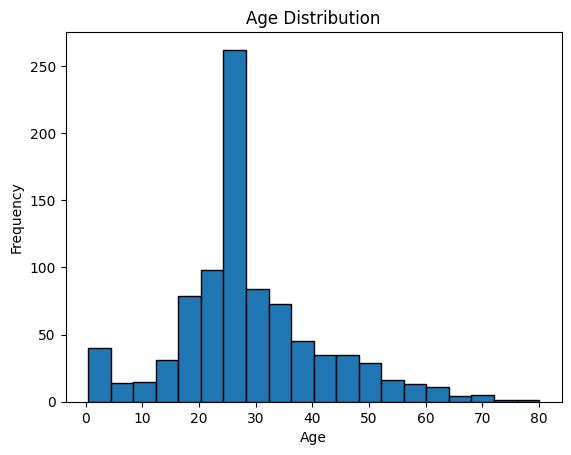

In [20]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

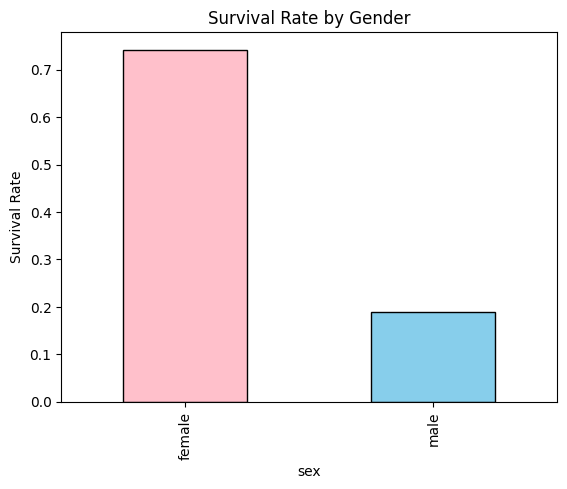

In [26]:
df.groupby("sex")["survived"].apply(lambda x: x.astype(int).mean()).plot(kind="bar", edgecolor="black", color=["pink", "skyblue"])
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()
